
<h1 align = center> <font color = "#53BBAA">Evaluation Techniques for classification models </font></h1>

---
<h2 align = center> <font color = "75F62A">1. Accuracy </font></h2>

#### What is Accuracy ? And how it is calculated ?

A. Accuracy is the measure of how many predictions our model got right out of all predictions it made. It is calculated by dividing the number of correct predictions by the total number of predictions made.

B. Accuracy = (Number of correct predictions) / (Total number of predictions)

---


<h2 align = center> <font color = "F6BA2A">2. Confusion Matrix </font></h2>


#### What is a Confusion Matrix and how it is used ?

 A. A confusion matrix is a table that summarizes the performance of a classification model on a set of test data for which the true values are known. It presents the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) for each possible classification.

 B. Confusion Matrix = [[TP, FP], [FN, TN]]

 ---




<h2 align = center> <font color = "F62AED">3. Precision </font></h2>

#### What is a Precision and how it is calculated ?



A. Precision is the measure of how many of the predicted positive results are actually true positive. It is calculated by dividing the number of true positives by the total number of positive predictions made.

B. Precision = TP / (TP + FP)

---



<h2 align = center> <font color = "9E2AF6">4. Recall(Sensitivity) </font></h2>


#### What is a Recall (Sensitivity) and how it is calculated ?.

A. Recall is the measure of how many of the actual positive results are correctly predicted as positive. It is calculated by dividing the number of true positives by the total number of actual positive cases.

B. Recall = TP / (TP + FN)

#### Difference between Precision and Recall:

Precision and recall are complementary metrics, meaning that increasing one of them will typically decrease the other. Precision is about the accuracy of positive predictions, while recall is about the proportion of actual positives that were correctly identified. However, when the focus is on the positive class (in this case, predicting fraud), it's important to consider both precision and recall to ensure that the model is not only detecting fraud but also accurately identifying it.

---



<h2 align = center> <font color = "5200FF">5. F1 Score</font></h2>

#### What is an F1 Score and how it is calculated ?

A. F1 Score is a harmonic mean of precision and recall. It is calculated by dividing the product of precision and recall by the sum of precision and recall, and then taking the reciprocal.

B. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

---


<h2 align = center> <font color = "FF0076">6. ROC Curve </font></h2>


#### What is a ROC Curve and how it is used ?

A. A Receiver Operating Characteristic (ROC) curve is a plot that shows the relationship between the true positive rate (TPR) and the false positive rate (FPR) at different classification thresholds. It is generated by plotting the TPR against the FPR for different threshold values.

B. ROC Curve = (TPR, FPR) for different threshold values

---



<h2 align = center> <font color = "FF8D73">7. AUC (Area Under the Curve) </font></h2>


#### What is a AUC and how it is calculated ?

A. AUC (Area Under the Curve) is a measure of the model's performance on a classification problem. It is calculated by integrating the TPR and FPR over a range of classification thresholds. A higher AUC indicates a better model at distinguishing between the positive and negative classes.

B. AUC = (1 + Area Under the ROC Curve) / 2

---




<h2 align = center> <font color = "FF0000">8. Cross-Validation </font></h2>


#### What is Cross-Validation and how it is used ?

A. Cross-validation is a technique used to evaluate the performance of a machine learning model by splitting the dataset into multiple subsets, training the model on different subsets, and evaluating its performance on each subset. The performance is then averaged over the subsets to obtain an estimate of the model's generalization ability.

B. Cross-Validation = (Number of Folds * Mean Performance) / Number of Folds

---



<h2 align = center> <font color = "FFE400">9. Learning Curve </font></h2>


#### What is the learning curve and how it is used ?

A. A learning curve is a plot that shows how the performance of a machine learning model improves as the training dataset size increases. It is generated by plotting the performance of the model on the training dataset and the validation dataset as the training dataset size increases.

B. Learning Curve = (Training Performance, Validation Performance) as the Training Dataset Size Increases

---

### Now we will use above evaluation methods on the our trained model.

<h2 align = center> <font color = '003FFF'>Importing Necessary Libraries </h2>


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix


<h2 align = center><font color = 'E4D902'> Importing Dataset </h2>


**About Dataset** :   
There are many dangerous bodies in space, one of them is N.E.O. - "Nearest Earth Objects". Some such bodies really pose a danger to the planet Earth, NASA classifies them as "is_hazardous". This dataset contains ALL NASA observations of similar objects from 1910 to 2024!!!

In [3]:
data = pd.read_csv('NEO.csv')

### Data columns

In [4]:
data.columns

Index(['neo_id', 'name', 'absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'orbiting_body', 'relative_velocity',
       'miss_distance', 'is_hazardous'],
      dtype='object')



<h2 align = center> <font color = '0CE402'>Data Analysis </h2>

---
### How Many Bodies Are Hazardous 

In [5]:
data['is_hazardous'].value_counts()

is_hazardous
False    295037
True      43162
Name: count, dtype: int64

### Plotting

<Axes: xlabel='is_hazardous', ylabel='count'>

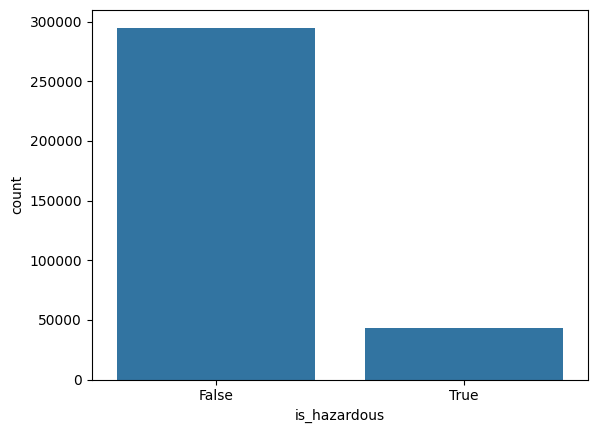

In [6]:
sns.countplot(x='is_hazardous', data=data)

#### Interpretation 

Out of 338,199 bodies , 295,037 are not hazardous for earth , but 43,162 are hazardous for earth.

---

---
### Absolute Magnitude Distribution

In [7]:
print(f"Mean: {data['absolute_magnitude'].mean()}")

print(f"Median: {data['absolute_magnitude'].median()}")

print(f"Standard Deviation: {data['absolute_magnitude'].std()}")

print(f"Min: {data['absolute_magnitude'].min()}")

print(f"Max: {data['absolute_magnitude'].max()}")


Mean: 22.93252495926617
Median: 22.8
Standard Deviation: 2.911216390292293
Min: 9.25
Max: 33.58


### Plotting


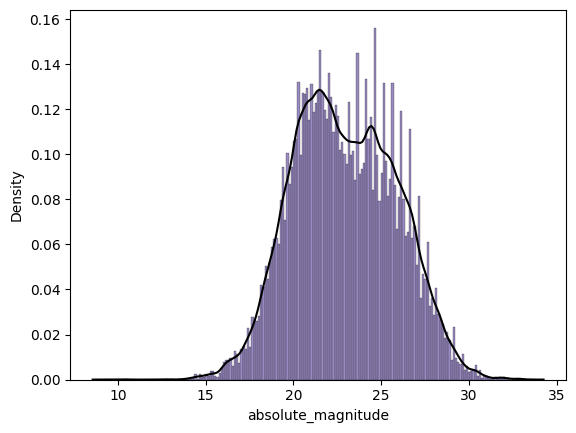

In [8]:
sns.histplot(data['absolute_magnitude'],color='#7765AB',stat='density')
sns.kdeplot(data['absolute_magnitude'], color = 'black')
plt.show()

### Absolute magnitude Correlation Between Estimated Diameter Min, Estimated Diameter Max , Relative Velocity and is_Hazardous

In [9]:


absoluteMagnitudeCorr = data[['absolute_magnitude','estimated_diameter_min', 'estimated_diameter_max','relative_velocity','is_hazardous']].corr()
absoluteMagnitudeCorr

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,is_hazardous
absolute_magnitude,1.000000,-0.594646,-0.594646,-0.345570,-0.343996
estimated_diameter_min,-0.594646,1.000000,1.000000,0.222434,0.164841
estimated_diameter_max,-0.594646,1.000000,1.000000,0.222434,0.164841
relative_velocity,-0.345570,0.222434,0.222434,1.000000,0.187021
is_hazardous,-0.343996,0.164841,0.164841,0.187021,1.000000


### Plotting 

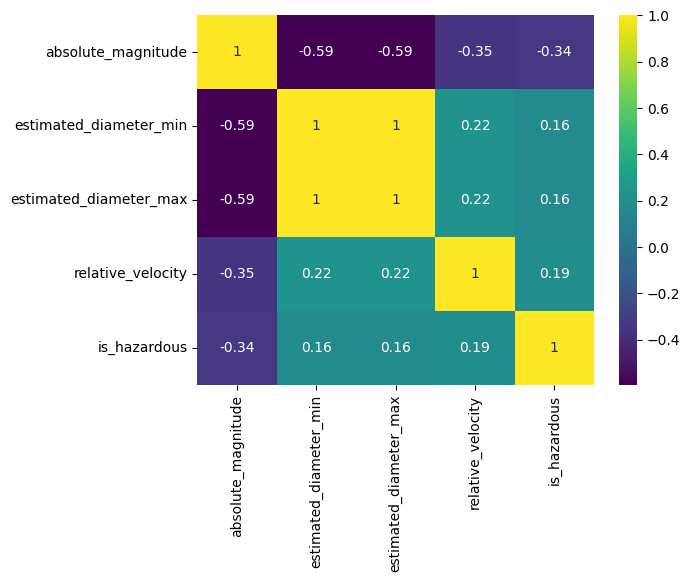

In [10]:
sns.heatmap(data = absoluteMagnitudeCorr , cmap='viridis' , annot = True )
plt.show()

### Interpretation 

From the correlation matrix, we can see that 'estimated_diameter_min', 'estimated_diameter_max','relative_velocity' have a negative correlation with 'absolute_magnitude'. This means that when these parameters increase, 'absolute_magnitude' decreases. 

---

### estimated_diameter_min Analysis


In [11]:

print(f"Mean: {data['estimated_diameter_min'].mean()} KM")

print(f"Median: {data['estimated_diameter_min'].median()} KM")

print(f"Standard Deviation: {data['estimated_diameter_min'].std()} KM")

print(f"Min: {data['estimated_diameter_min'].min()} KM")

print(f"Max: {data['estimated_diameter_min'].max()} KM")

Mean: 0.1578120466605549 KM
Median: 0.0732073989 KM
Standard Deviation: 0.31388513787968714 KM
Min: 0.0005111578 KM
Max: 37.5452479361 KM


### estimated_diameter_min Distribution


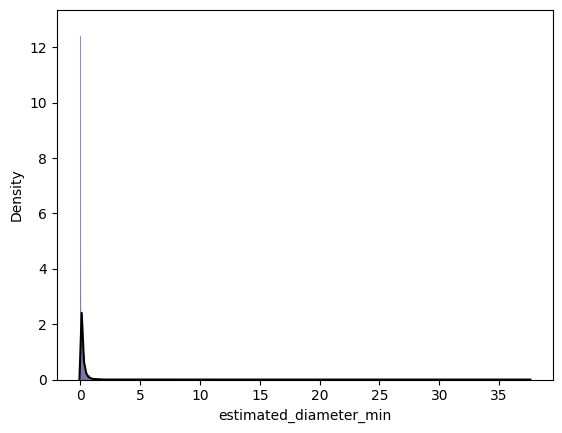

In [12]:

sns.histplot(data['estimated_diameter_min'],color='#7765AB',stat='density')
sns.kdeplot(data['estimated_diameter_min'], color = 'black')

plt.show()

---
### estimated_diameter_max Analysis


In [13]:

print(f"Mean: {data['estimated_diameter_max'].mean()} KM")

print(f"Median: {data['estimated_diameter_max'].median()} KM")

print(f"Standard Deviation: {data['estimated_diameter_max'].std()} KM")

print(f"Min: {data['estimated_diameter_max'].min()} KM")

print(f"Max: {data['estimated_diameter_max'].max()} KM")


Mean: 0.3528784640005492 KM
Median: 0.1636967205 KM
Standard Deviation: 0.7018685054244453 KM
Min: 0.0011429835 KM
Max: 83.9537266171 KM



### estimated_diameter_max Distribution

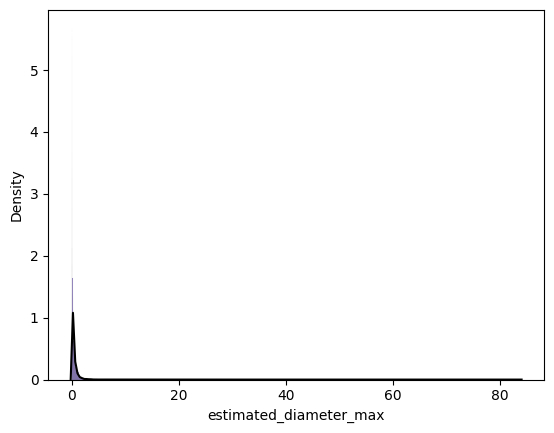

In [14]:


sns.histplot(data['estimated_diameter_max'],color='#7765AB',stat='density')
sns.kdeplot(data['estimated_diameter_max'], color = 'black')

plt.show()


---

### estimated_diameter_max vs estimated_diameter_min

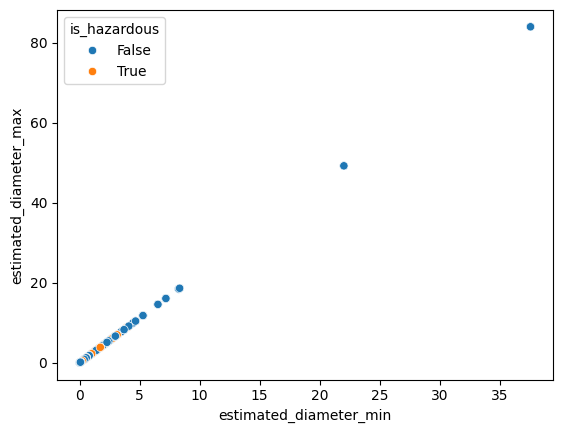

In [15]:


sns.scatterplot(x='estimated_diameter_min', y='estimated_diameter_max', hue='is_hazardous', data=data)

plt.show()

### Interpretation

From the scatter plot, we can see that there is a positive correlation between 'estimated_diameter_min' and 'estimated_diameter_max'. This means that when 'estimated_diameter_min' increases, 'estimated_diameter_max' also increases.

---

### Relative Velocity Analysis

In [16]:
print(f"Mean: {data['relative_velocity'].mean()} km/s")
print(f"Median: {data['relative_velocity'].median()} km/s")
print(f"Standard Deviation: {data['relative_velocity'].std()} km/s")
print(f"Min: {data['relative_velocity'].min()} km/s")
print(f"Max: {data['relative_velocity'].max()} km/s")

Mean: 51060.662907595586 km/s
Median: 47560.4654744848 km/s
Standard Deviation: 26399.238434899446 km/s
Min: 203.34643253 km/s
Max: 291781.1066131202 km/s


### Relative Velocity Distribution



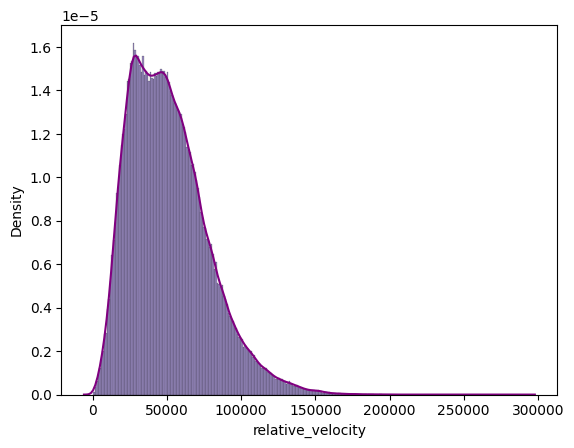

In [17]:
sns.histplot(data['relative_velocity'],color='#7765AB',stat='density')

sns.kdeplot(data['relative_velocity'], color = 'purple')

plt.show()

### Interpretation

From the distribution plot, we can see that there are some outliers



### Relative Velocity Correlation with estimated_diameter_min , estimated_diameter_max and is_hazardous

In [18]:

relativeVelocityCorr = data[['relative_velocity','estimated_diameter_min', 'estimated_diameter_max','is_hazardous']].corr()

relativeVelocityCorr

,relative_velocity,estimated_diameter_min,estimated_diameter_max,is_hazardous
relative_velocity,1.000000,0.222434,0.222434,0.187021
estimated_diameter_min,0.222434,1.000000,1.000000,0.164841
estimated_diameter_max,0.222434,1.000000,1.000000,0.164841
is_hazardous,0.187021,0.164841,0.164841,1.000000


### Heatmap of Correlation

<Axes: >

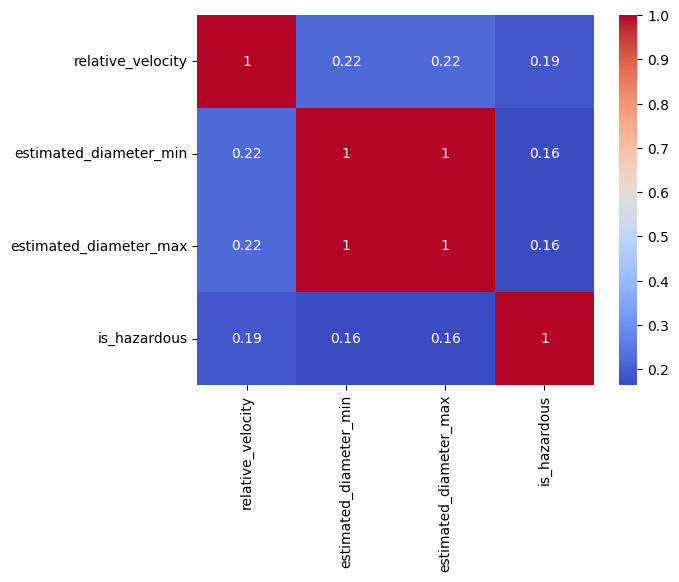

In [19]:
sns.heatmap(relativeVelocityCorr,cmap='coolwarm',annot = True)

### Interpretation

From the correlation matrix, we can see that'relative_velocity' has a very weak positive correlation with 'estimated_diameter_min', 'estimated_diameter_max' and 'is_hazardous'. This means that when these parameters increase, 'relative_velocity' also increases.



---

### Miss Distance Analysis

In [20]:


print(f"Mean: {data['miss_distance'].mean()} KM")

print(f"Median: {data['miss_distance'].median()} KM")

print(f"Standard Deviation: {data['miss_distance'].std()} KM")

print(f"Min: {data['miss_distance'].min()} KM")

print(f"Max: {data['miss_distance'].max()} KM")

Mean: 41535350.93219019 KM
Median: 43326743.82834823 KM
Standard Deviation: 20773990.24610241 KM
Min: 6745.532515957 KM
Max: 74798651.4521972 KM


### Miss Distance Distribution



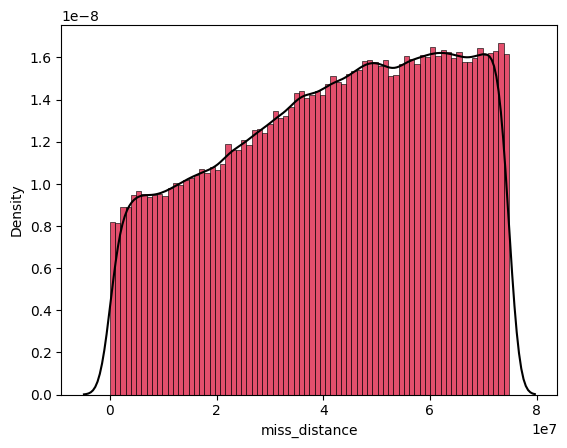

In [21]:
sns.histplot(data['miss_distance'],color='crimson',stat='density')
sns.kdeplot(data['miss_distance'], color = 'black')

plt.show()

### Miss Distance Correlation with is_hazardous, absolute_magnitude, relative_velocity  

In [22]:

missDistanceCorr = data[['miss_distance','is_hazardous', 'absolute_magnitude','relative_velocity']].corr()

missDistanceCorr

,miss_distance,is_hazardous,absolute_magnitude,relative_velocity
miss_distance,1.000000,-0.006540,-0.213523,0.322587
is_hazardous,-0.006540,1.000000,-0.343996,0.187021
absolute_magnitude,-0.213523,-0.343996,1.000000,-0.345570
relative_velocity,0.322587,0.187021,-0.345570,1.000000




### Heatmap of Correlation

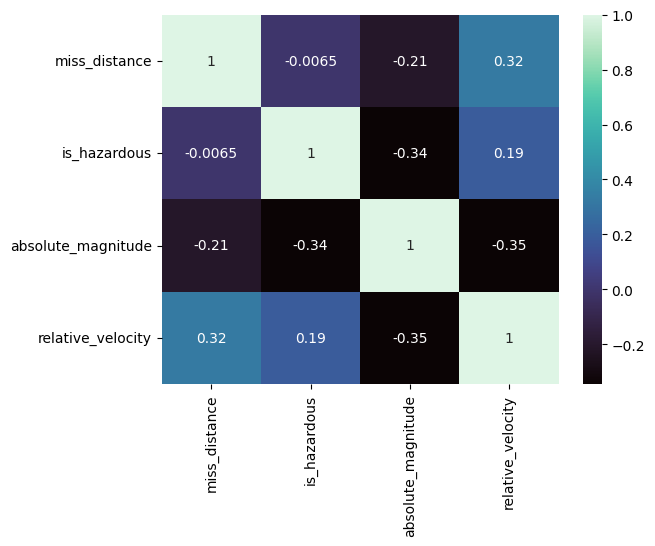

In [23]:


sns.heatmap(missDistanceCorr, cmap='mako',annot = True)
plt.show()

### Interpretation

From the correlation matrix, we can see that'miss_distance' has a weak negative correlation with 'is_hazardous' and 'absolute_magnitude', which means as the 'miss_distance' increase , 'is_hazardous' and 'absolute_magnitude' decreases . And as 'miss_distance' increases , 'relative_velocity' also increase because they have weak positive correlation.



<h2 align = center> <font color = '56009B'>Data Preprocessing </h2>

### Data columns

In [24]:
data.columns

Index(['neo_id', 'name', 'absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'orbiting_body', 'relative_velocity',
       'miss_distance', 'is_hazardous'],
      dtype='object')

### Data columns datatypes



In [25]:
data.dtypes

neo_id                      int64
name                       object
absolute_magnitude        float64
estimated_diameter_min    float64
estimated_diameter_max    float64
orbiting_body              object
relative_velocity         float64
miss_distance             float64
is_hazardous                 bool
dtype: object

### Checking for Missing Values

In [26]:
data.isnull().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

### Dropping missing values


In [27]:
data = data.dropna(axis = 0)


### Dropping Irrelevent Columns

dropping 'name' and 'neo_id' column

In [28]:
data = data.drop(['name', 'neo_id'], axis = 1)

### Converting Categorical values to Numeric values

In [29]:
data.dtypes

absolute_magnitude        float64
estimated_diameter_min    float64
estimated_diameter_max    float64
orbiting_body              object
relative_velocity         float64
miss_distance             float64
is_hazardous                 bool
dtype: object

#### Converting orbiting_body

In [30]:
data['orbiting_body'].unique()

array(['Earth'], dtype=object)

Since orbiting_body only have one unique value , so we can also drop this column

In [31]:
data = data.drop(['orbiting_body'], axis = 1)

#### Converting is_hazardous from bool to numeric 


In [32]:
data['is_hazardous'] = data['is_hazardous'].astype(int)




<h2 align = center> <font color = 'E9008C'>Model Training </h2>

In [33]:
X = data.drop('is_hazardous', axis = 1)
y = data['is_hazardous']

### Splitting Data into Training and Testing Data

In [34]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Model Training

In [41]:
model = GradientBoostingClassifier()
model.fit(X_train,y_train)


GradientBoostingClassifier()

### Now take a look at all the evaluation methods

<h2 align = center> <font color = "75F62A">1. Accuracy </font></h2>

Let's First Find Accuracy Using Our Manual Implementation

In [42]:


y_pred = model.predict(X_test)

accuracy =  np.sum(np.equal(y_test,y_pred))/len(y_test)

print(f'Accuracy: {accuracy}')


Accuracy: 0.8859761957566349


Now let's find accuracy using sklearn algorithm

In [43]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8859761957566349

#### As we can see , both matches and it says that our model can predict 87.36% accurately.

<h2 align = center> <font color = "F6BA2A">2. Confusion Matrix </font></h2>

Now we are making confusion matrix using sklearn

In [44]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[58520,   568],
       [ 7144,  1403]])

### Plotting Confusion Matrix



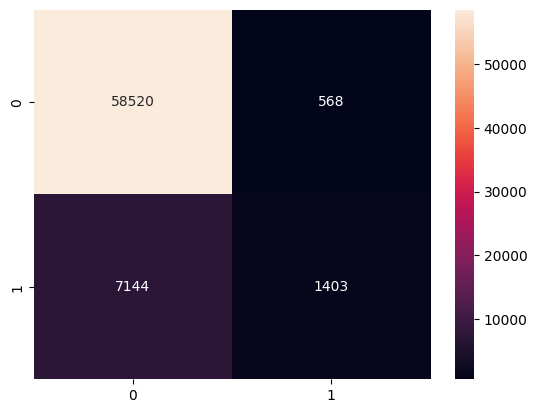

In [45]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### Interpretation 

As we can see , our model is good predicting 0 but it is not good predicting 1. This issue can be solved by tuning the hyperparameters


<h2 align = center> <font color = "F62AED">3. Precision </font></h2>

Let's implement manually first , we use our confusion matrix for this purpose

In [48]:
truePositive = 1403
falsePositive = 568

precision = truePositive / (truePositive + falsePositive)

precision


0.7118214104515475

Let's Check Using the sklearn 

In [47]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)


np.float64(0.7118214104515475)

### Interpretation

Our model precision is 71.1% which means that out of all the instances that the model predicted as positive, 71.2% of them were actually positive. In other words, 71.2% of the positive predictions made by the model were correct.

<h2 align = center> <font color = "9E2AF6">4. Recall(Sensitivity) </font></h2>

First , let's implement it manually

In [49]:
truePositive = 1403
falseNegative = 7144
recall = truePositive / (truePositive + falseNegative)

recall

0.16415116415116415

Now check it using sklearn 

In [50]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)



np.float64(0.16415116415116415)

### Interpretation

A recall score of 0.164 means that only 16.4% of the actual positive instances in dataset were correctly identified by the model. This suggests that the model is missing a significant number of true positive cases (high false negatives).


<h2 align = center> <font color = "5200FF">5. F1 Score</font></h2>

Manual Implementation

In [51]:
f1 = 2 * (recall * precision)/(recall + precision)
f1

0.26678075679787033

Using sklearn

In [52]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)



np.float64(0.26678075679787033)

### Interpretation

An F1 score of approximately 0.267 (or 26.7%) indicates that the model has a low balance between precision and recall. The F1 score is a metric that combines both precision and recall into a single number, making it useful for evaluating the overall performance of a classification model, especially when dealing with imbalanced datasets.


<h2 align = center> <font color = "FF0076">6. ROC Curve </font></h2>


###  we will calculate ROC score using sklearn


c:\Python312\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


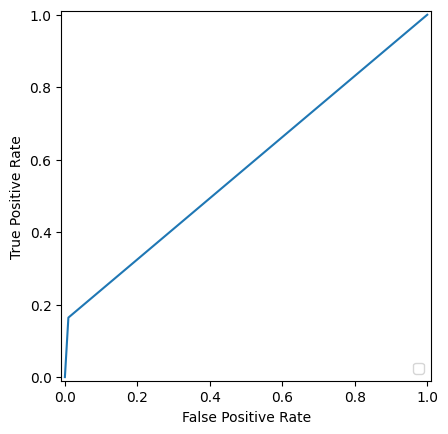

In [63]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

falsePositiveRate , truePositiveRate , thres = roc_curve(y_test, y_pred)

roc_display = RocCurveDisplay(fpr = falsePositiveRate , tpr = truePositiveRate)

roc_display.plot()

plt.show()



### Interpretation 

As we can see , model is good predicting False positive but bad in predicting True positive.



<h2 align = center> <font color = "FF8D73">7. AUC (Area Under the Curve) </font></h2>

Using sklearn

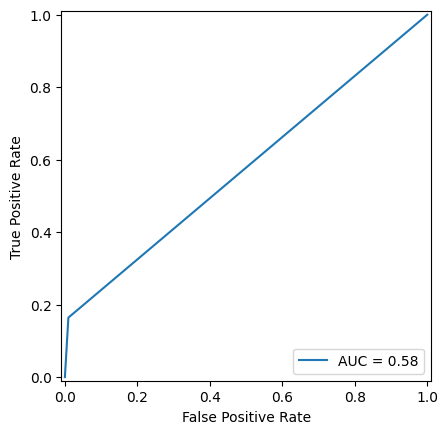

In [65]:
from sklearn.metrics import auc

AUC = auc(falsePositiveRate,truePositiveRate)

roc_display = RocCurveDisplay(fpr=falsePositiveRate, tpr=truePositiveRate, roc_auc=AUC)
roc_display.plot()

plt.show()



### Interpretation

AUC score is 0.58 which indicates that the model random. A perfect model would have an AUC score of 1, while a random model would have an AUC score of 0.5.

<h2 align = center> <font color = "FF0000">8. Cross-Validation </font></h2>

Manual Implementation

In [67]:
validationTimes = 5
scores = []

for _ in range(validationTimes):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

meanScore = np.mean(scores)

print(f"Scores : {scores}")
print(f"Mean Score : {meanScore}")
    

Scores : [0.8847933762105419, 0.8867598137059215, 0.8853847859835884, 0.8859318400236564, 0.8849560138981296]
Mean Score : 0.8855651659643675


Using sklearn

In [66]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
scores

array([0.88341835, 0.88440725, 0.88464382, 0.88601887, 0.88850282])

### Interpretation

Cross-validation scores are 0.88341835, 0.88440725, 0.88464382, 0.88601887, 0.88850282. The mean score of these 5 validations is approximately 0.885. This suggests that the model has a good generalization capability.



<h2 align = center> <font color = "FFE400">9. Learning Curve </font></h2>

Using sklearn

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))



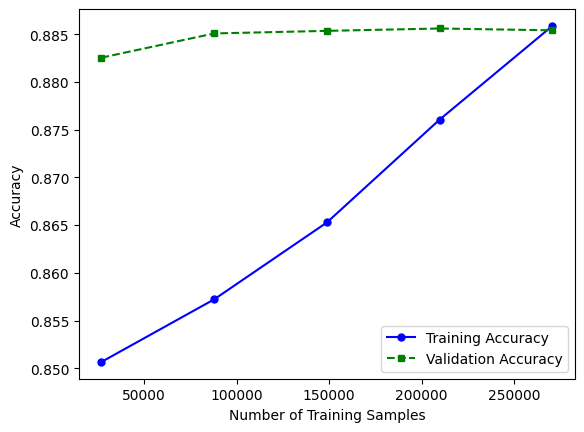

In [80]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5, label='Training Accuracy')

plt.plot(train_sizes, test_mean,color='green', linestyle='--',marker='s', markersize=5, label='Validation Accuracy')


plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')
plt.show()


### Interpretation

As we can see, as the number of training samples increases, the training accuracy also increases, while the validation accuracy approximately remains same after 100000 Training Samples.